### NoteBook Contents (Data Overview & Exploratory Analysis):
            > 1. Data Overview
            > 2. Seperating Numeric and Categorical features
            > 3. Missing Value Analysis
            > 4. Numerical Features Univariate Distribution and Potential Outliers Analysis
            > 5. Correlation Analysis Numerical Features
            > 6. Categorical Features Univariate Distribution Analysis
            > 7. Bivariate Distributions : Target Variable with respect to Numerical Features
            > 8. Bivariate Distributions : Target Variable with respect to Categorical Features

#### Importing Essential Data handling libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

import time
from math import floor

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### Loading Data

In [2]:
df_master = pd.read_csv("..\\0_Modeling_Data\\data.csv") ## looking for dataset ,up one directory

In [3]:
df_raw = df_master.copy()

### 1. Data Overview / Exploration

In [4]:
## shape of the full data
print("Rows :", df_raw.shape[0])
print("Columns : ",  df_raw.shape[1])

Rows : 30000
Columns :  25


In [5]:
## peeking at the dataset sample
df_raw.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.000,2,2,1,24,2,2,-1,-1,-2,-2,3913.000,3102.000,689.000,0.000,0.000,0.000,0,689,0,0,0,0,1
1,2,120000.000,2,2,2,26,-1,2,0,0,0,2,2682.000,1725.000,2682.000,3272.000,3455.000,3261.000,0,1000,1000,1000,0,2000,1
2,3,90000.000,2,2,2,34,0,0,0,0,0,0,29239.000,14027.000,13559.000,14331.000,14948.000,15549.000,1518,1500,1000,1000,1000,5000,0
3,4,50000.000,2,2,1,37,0,0,0,0,0,0,46990.000,48233.000,49291.000,28314.000,28959.000,29547.000,2000,2019,1200,1100,1069,1000,0
4,5,50000.000,1,2,1,57,-1,0,-1,0,0,0,8617.000,5670.000,35835.000,20940.000,19146.000,19131.000,2000,36681,10000,9000,689,679,0


## Dataset

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from **April 2005** to **September 2005**. 

## Content

There are 25 variables:

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)

Class Frequency Count
0    23364
1     6636
Name: default payment next month, dtype: int64


Class Percentage
0   77.880
1   22.120
Name: default payment next month, dtype: float64


Text(0.5, 1.0, 'Class distribution')

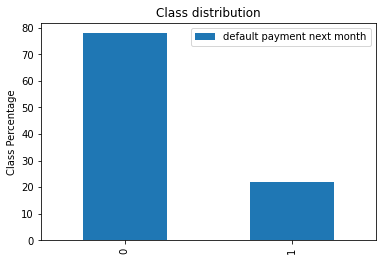

In [6]:
## Target variable class distribution
print("Class Frequency Count")
print(df_raw["default payment next month"].value_counts()) ## frequency counts
print("\n")
print("Class Percentage")
print(df_raw["default payment next month"].value_counts(normalize = True)*100) ## Percentage 

pd.DataFrame(df_raw["default payment next month"].value_counts(normalize = True)*100).plot(kind = "bar")
plt.ylabel("Class Percentage")
plt.title("Class distribution")

##### Target Classes have some imbalanced distribution but not highly skewed

In [7]:
## Dropping "ID" field since its a unique identifier 
df_raw.drop("ID", axis = 1, inplace = True)

In [8]:
df_raw.shape # Now we have 23 predictors and 1 Target variable

(30000, 24)

In [9]:
df_raw.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000.000,2,2,1,24,2,2,-1,-1,-2,-2,3913.000,3102.000,689.000,0.000,0.000,0.000,0,689,0,0,0,0,1
1,120000.000,2,2,2,26,-1,2,0,0,0,2,2682.000,1725.000,2682.000,3272.000,3455.000,3261.000,0,1000,1000,1000,0,2000,1
2,90000.000,2,2,2,34,0,0,0,0,0,0,29239.000,14027.000,13559.000,14331.000,14948.000,15549.000,1518,1500,1000,1000,1000,5000,0


In [10]:
## quick info of the dataset : looking at the datatypes
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29872 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   29954 non-null  float64
 12  BILL_AMT2                   29988 non-null  float64
 13  BILL_AMT3                   299

In [11]:
### all the predictors are numerical

### 2. Seperating Predictors (numerical and categorical) and Target variable : 

In [12]:
target_variable = "default payment next month"

In [13]:
## Assumption  : if the nuber of unique values in the feature are < 0.05 % of the total observations, then treat this as categorical feature

categorical_threshold = df_raw.shape[0]*0.05/100
print(categorical_threshold)

categorical_variables = df_raw.drop(target_variable, axis = 1).apply(lambda x: len(np.unique(x.value_counts()))).index[(df_raw.drop(target_variable, axis = 1).apply(lambda x: len(np.unique(x.value_counts()))) < categorical_threshold)]
categorical_variables = list(categorical_variables)
print(categorical_variables)

15.0
['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [14]:
### predictors
numeric_variables = df_raw.drop([target_variable] + categorical_variables,axis = 1).columns.to_list()
print(numeric_variables)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [15]:
print(len(categorical_variables))
print(len(numeric_variables))

9
14


### 3. Missing Value Analysis:

##### i) Numerical features

In [16]:
## Count of missing values
pd.Series(df_raw[numeric_variables].isnull().sum())

LIMIT_BAL    128
AGE            0
BILL_AMT1     46
BILL_AMT2     12
BILL_AMT3     16
BILL_AMT4      4
BILL_AMT5      6
BILL_AMT6      4
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
dtype: int64

In [17]:
## Missing values percentage
pd.Series(df_raw[numeric_variables].isnull().sum()/df_raw.shape[0]*100).sort_values(ascending  = False)

LIMIT_BAL   0.427
BILL_AMT1   0.153
BILL_AMT3   0.053
BILL_AMT2   0.040
BILL_AMT5   0.020
BILL_AMT4   0.013
BILL_AMT6   0.013
AGE         0.000
PAY_AMT1    0.000
PAY_AMT2    0.000
PAY_AMT3    0.000
PAY_AMT4    0.000
PAY_AMT5    0.000
PAY_AMT6    0.000
dtype: float64

In [18]:
### numeric variables having missing values
num_vars_missing = df_raw[numeric_variables].isnull().sum()[df_raw.isnull().sum()!=0].index.to_list()
num_vars_missing

['LIMIT_BAL',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6']

##### ii) Categorical features

In [19]:
## Count of missing values
pd.Series(df_raw[categorical_variables].isnull().sum())

SEX          0
EDUCATION    0
MARRIAGE     0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
dtype: int64

### 4. Univariate Distribution and Potential Outliers Analysis

##### looking at raw figures

In [20]:
df_raw[numeric_variables].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29872.000,30000.000,29954.000,29988.000,29984.000,29996.000,29994.000,29996.000,30000.000,30000.000,30000.000,30000.000,30000.000,30000.000
mean,167410.608,35.486,51224.649,49165.454,47018.089,43262.566,40314.997,38868.813,5663.581,5921.163,5225.681,4826.077,4799.388,5215.503
std,129721.364,9.218,73619.488,71132.444,69355.175,64336.673,60802.117,59555.614,16563.280,23040.870,17606.961,15666.160,15278.306,17777.466
min,10000.000,21.000,-165580.000,-69777.000,-157264.000,-170000.000,-81334.000,-339603.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,50000.000,28.000,3558.250,2984.750,2667.750,2324.500,1763.250,1256.000,1000.000,833.000,390.000,296.000,252.500,117.750
50%,140000.000,34.000,22383.000,21194.500,20089.500,19051.000,18104.500,17068.000,2100.000,2009.000,1800.000,1500.000,1500.000,1500.000
75%,240000.000,41.000,67113.500,64006.250,60169.500,54506.000,50208.500,49177.250,5006.000,5000.000,4505.000,4013.250,4031.500,4000.000
max,1000000.000,79.000,964511.000,983931.000,1664089.000,891586.000,927171.000,961664.000,873552.000,1684259.000,896040.000,621000.000,426529.000,528666.000


##### Plotting Histograms 

In [21]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'font.size': 6.5})

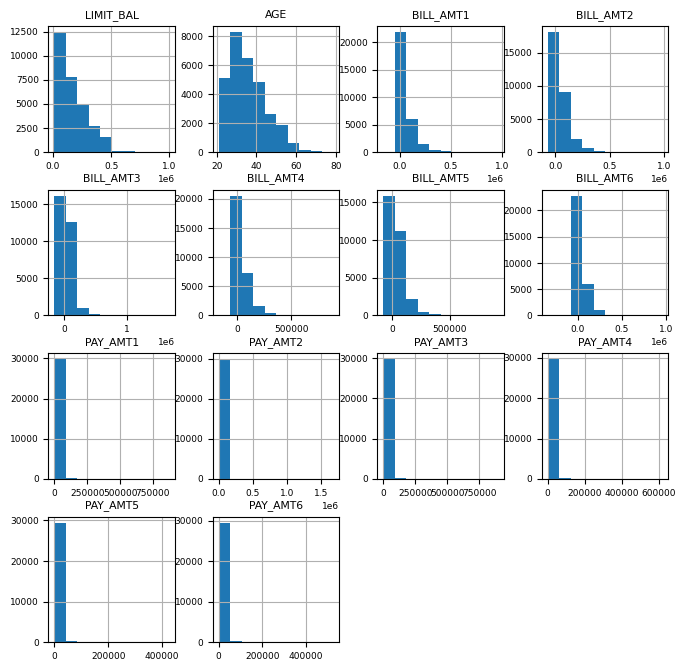

In [22]:
plt.rcParams["figure.figsize"] = [8, 8]
df_raw[numeric_variables].hist()
plt.show()

##### Plotting Boxplots to see the distribution more clearly, and any potential outliers

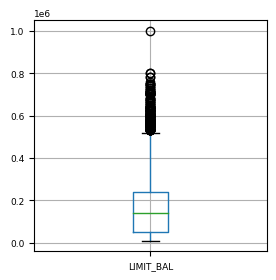

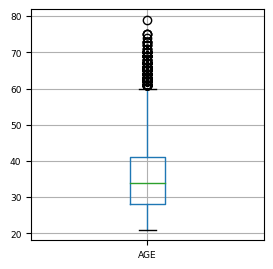

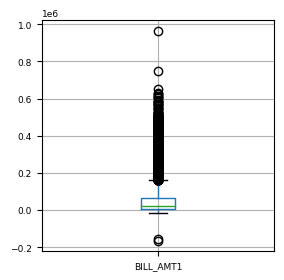

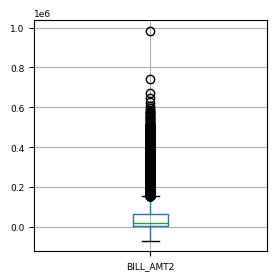

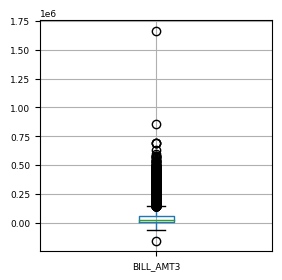

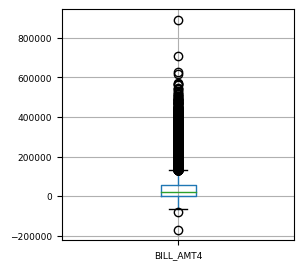

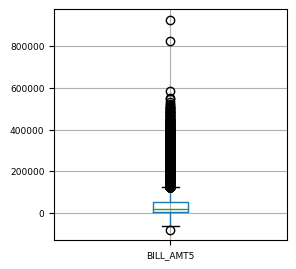

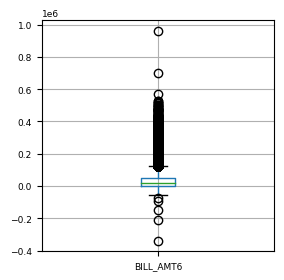

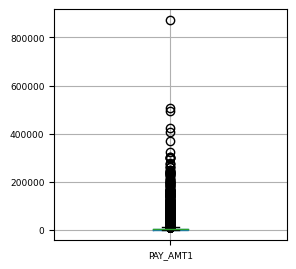

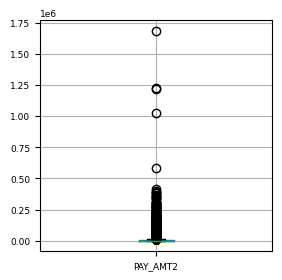

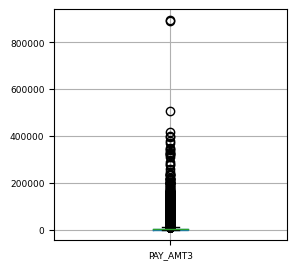

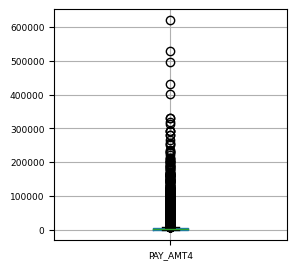

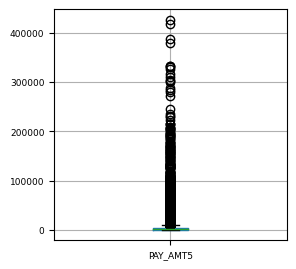

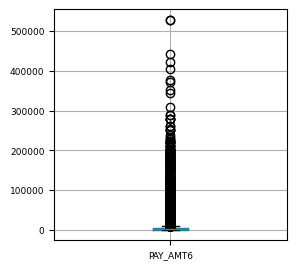

In [23]:
plt.rcParams["figure.figsize"] = [3, 3]
for feat in numeric_variables:
    df_raw[[feat]].boxplot()
    plt.show()

### 5. Correlation Analysis Numerical Features

In [24]:
correlations = df_raw[numeric_variables].corr(method='pearson')

In [25]:
mpl.rcParams.update(mpl.rcParamsDefault)

<AxesSubplot:>

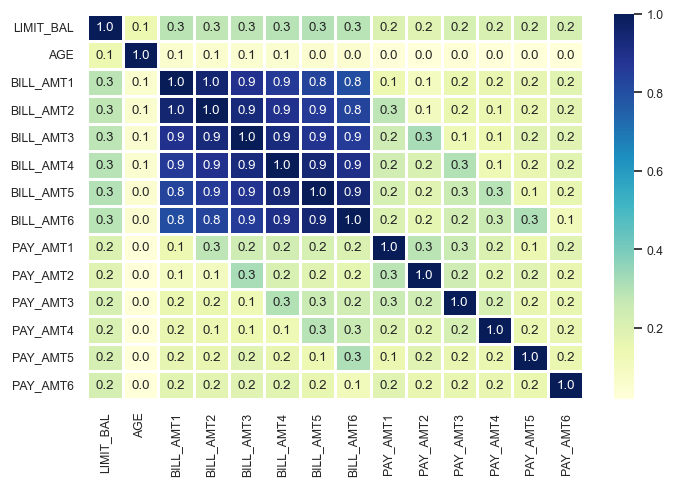

In [26]:
#correlation map
sns.set(font_scale=0.8)
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(np.abs(correlations), annot=True, linewidths= .8, fmt= ".1f",ax=ax, cmap="YlGnBu")

### 6. Categorical Features Univariate Distribution Analysis

##### Looking at raw counts

SEX
2    18112
1    11888
Name: SEX, dtype: int64


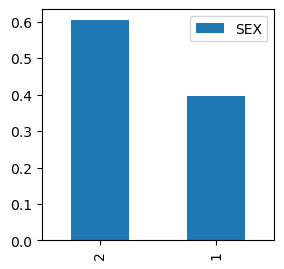



EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


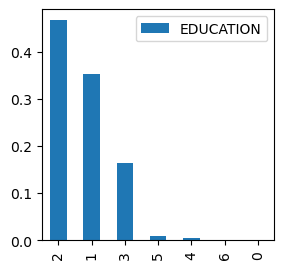



MARRIAGE
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


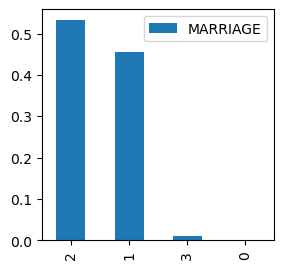



PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


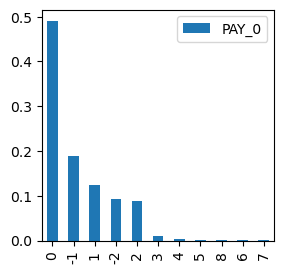



PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


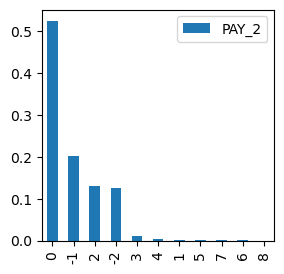



PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64


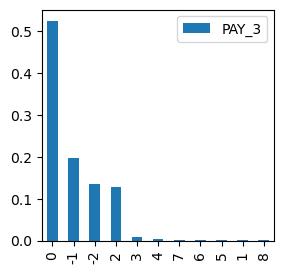



PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64


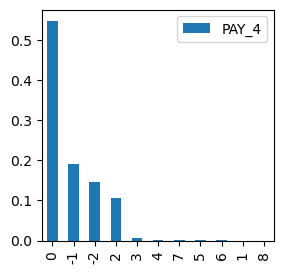



PAY_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64


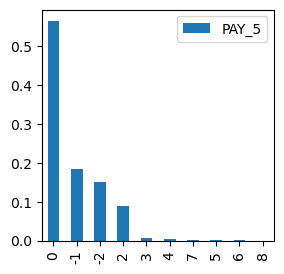



PAY_6
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


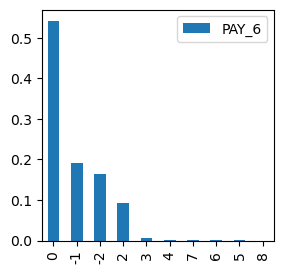

In [27]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = [3, 3]
for cat_feat in categorical_variables :
    print(cat_feat)
    print(df_raw[cat_feat].value_counts(dropna = False))
    pd.DataFrame(df_raw[cat_feat].value_counts(normalize=True)).plot(kind = "bar")
    plt.show()
    time.sleep(1)
    print("\n")

### 7. Bivariate Distributions : Target Variable with respect to Numerical Features

In [28]:
numeric_df_with_target = df_raw[numeric_variables].copy()
numeric_df_with_target[target_variable] = df_raw[target_variable].values

In [29]:
numeric_df_with_target.head(3)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000.000,24,3913.000,3102.000,689.000,0.000,0.000,0.000,0,689,0,0,0,0,1
1,120000.000,26,2682.000,1725.000,2682.000,3272.000,3455.000,3261.000,0,1000,1000,1000,0,2000,1
2,90000.000,34,29239.000,14027.000,13559.000,14331.000,14948.000,15549.000,1518,1500,1000,1000,1000,5000,0


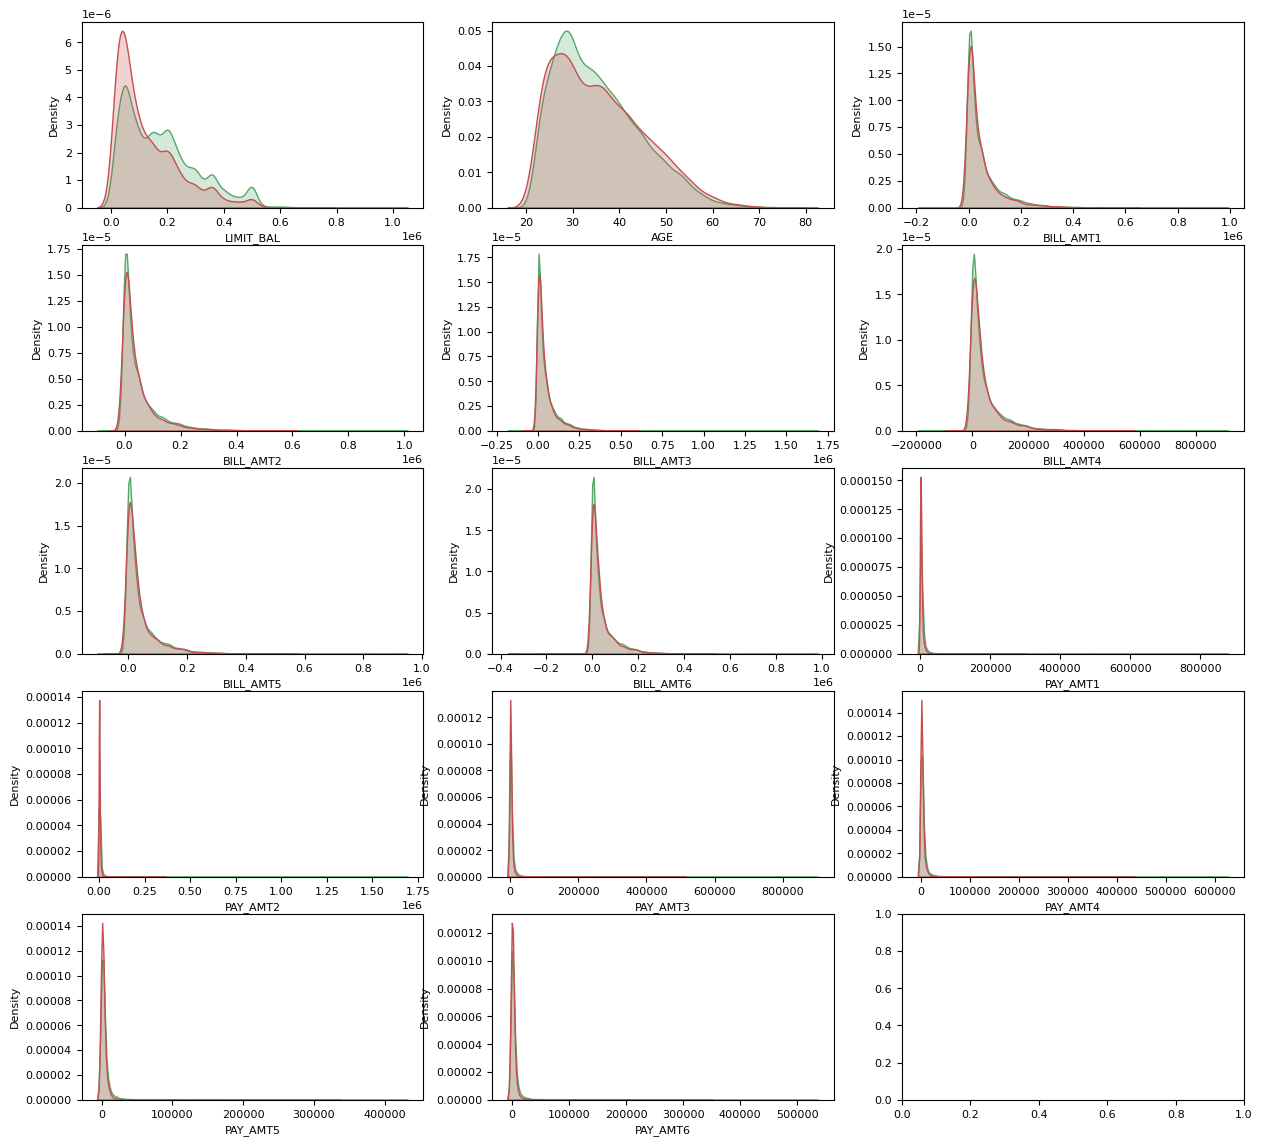

In [30]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'font.size': 8})

ncols = 3
nrows = 5

plt.rcParams["figure.figsize"] = [15, 14]
fig, axs = plt.subplots(ncols = ncols, nrows = nrows)

for i,var in enumerate(list(numeric_df_with_target.columns)[:-1]):
#     axs[floor(i/ncols), i%ncols].set_title(var)
    sns.kdeplot(numeric_df_with_target.loc[numeric_df_with_target[target_variable]==0,var], shade=True, 
                color="g",  label = "0" , ax = axs[floor(i/ncols), i%ncols])
    sns.kdeplot(numeric_df_with_target.loc[numeric_df_with_target[target_variable]==1,var], shade=True, 
                color="r",  label = "1" , ax = axs[floor(i/ncols), i%ncols])

### 8. Bivariate Distributions : Target Variable with respect to Categorical Features

In [31]:
categorical_df_with_target = df_raw[categorical_variables].copy()
categorical_df_with_target[target_variable] = df_raw[target_variable].values

In [32]:
categorical_df_with_target.head(3)

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default payment next month
0,2,2,1,2,2,-1,-1,-2,-2,1
1,2,2,2,-1,2,0,0,0,2,1
2,2,2,2,0,0,0,0,0,0,0


##### SEX

In [33]:
pd.crosstab(categorical_df_with_target["SEX"], 
            categorical_df_with_target[target_variable],
           normalize="index" )

default payment next month,0,1
SEX,,
1,0.758,0.242
2,0.792,0.208


##### EDUCATION

In [34]:
pd.crosstab(categorical_df_with_target["EDUCATION"], 
            categorical_df_with_target[target_variable],
           normalize="index" )

default payment next month,0,1
EDUCATION,,
0,1.000,0.000
1,0.808,0.192
2,0.763,0.237
3,0.748,0.252
4,0.943,0.057
5,0.936,0.064
6,0.843,0.157


<AxesSubplot:xlabel='EDUCATION'>

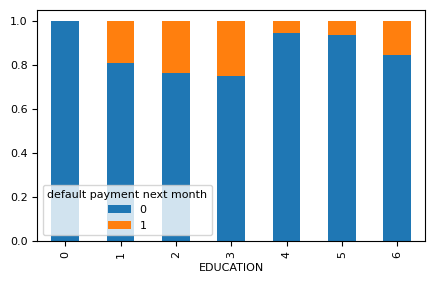

In [35]:
plt.rcParams["figure.figsize"] = [5, 3]
plt.rcParams.update({'font.size': 8})

pd.crosstab(categorical_df_with_target["EDUCATION"], 
            categorical_df_with_target[target_variable],
           normalize="index" ).plot(kind = "bar", stacked = True)

##### MARRIAGE

In [36]:
pd.crosstab(categorical_df_with_target["MARRIAGE"], 
            categorical_df_with_target[target_variable],
           normalize="index" )

default payment next month,0,1
MARRIAGE,,
0,0.907,0.093
1,0.765,0.235
2,0.791,0.209
3,0.740,0.260


<AxesSubplot:xlabel='MARRIAGE'>

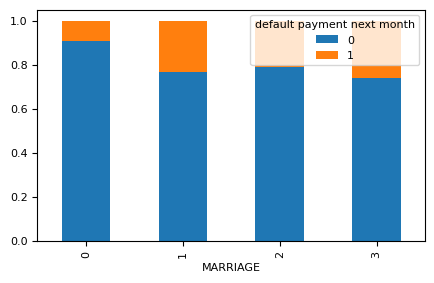

In [37]:
plt.rcParams["figure.figsize"] = [5, 3]
plt.rcParams.update({'font.size': 8})

pd.crosstab(categorical_df_with_target["MARRIAGE"], 
            categorical_df_with_target[target_variable],
           normalize="index" ).plot(kind = "bar", stacked = True)

default payment next month     0     1
PAY_0                                 
 7                         0.222 0.778
 3                         0.242 0.758
 2                         0.309 0.691
 4                         0.316 0.684
 8                         0.421 0.579
 6                         0.455 0.545
 5                         0.500 0.500
 1                         0.661 0.339
-1                         0.832 0.168
-2                         0.868 0.132
 0                         0.872 0.128


<AxesSubplot:xlabel='PAY_0'>

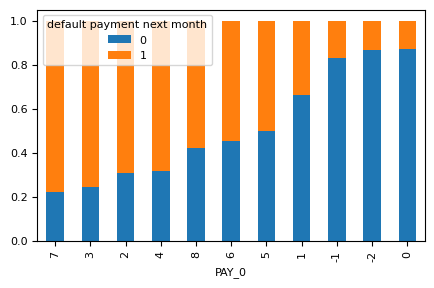

In [38]:
## PAY_0
tdf  = df_raw.groupby("PAY_0")[target_variable].value_counts(normalize = True).unstack().sort_values(by = 1,ascending=False)
print(tdf)
tdf.plot(kind='bar', stacked='True')

default payment next month     0     1
PAY_2                                 
 6                         0.250 0.750
 3                         0.383 0.617
 5                         0.400 0.600
 7                         0.400 0.600
 2                         0.444 0.556
 4                         0.495 0.505
-2                         0.817 0.183
 1                         0.821 0.179
-1                         0.840 0.160
 0                         0.841 0.159
 8                         1.000   NaN


<AxesSubplot:xlabel='PAY_2'>

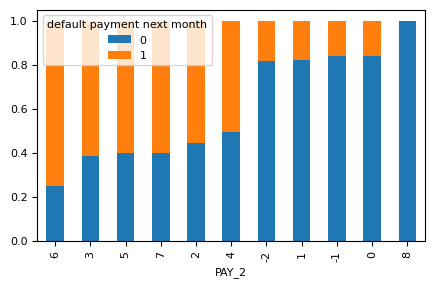

In [39]:
## PAY_2
tdf  = df_raw.groupby("PAY_2")[target_variable].value_counts(normalize = True).unstack().sort_values(by = 1,ascending=False)
print(tdf)
tdf.plot(kind='bar', stacked='True')

default payment next month     0     1
PAY_3                                 
 7                         0.185 0.815
 8                         0.333 0.667
 6                         0.391 0.609
 4                         0.421 0.579
 3                         0.425 0.575
 5                         0.429 0.571
 2                         0.484 0.516
 1                         0.750 0.250
-2                         0.815 0.185
 0                         0.825 0.175
-1                         0.844 0.156


<AxesSubplot:xlabel='PAY_3'>

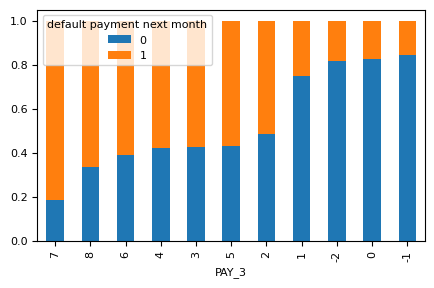

In [40]:
## PAY_3
tdf  = df_raw.groupby("PAY_3")[target_variable].value_counts(normalize = True).unstack().sort_values(by = 1,ascending=False)
print(tdf)
tdf.plot(kind='bar', stacked='True')

default payment next month     0     1
PAY_4                                 
 7                         0.172 0.828
 4                         0.333 0.667
 3                         0.389 0.611
 2                         0.477 0.523
 5                         0.486 0.514
 1                         0.500 0.500
 8                         0.500 0.500
 6                         0.600 0.400
-2                         0.807 0.193
 0                         0.817 0.183
-1                         0.841 0.159


<AxesSubplot:xlabel='PAY_4'>

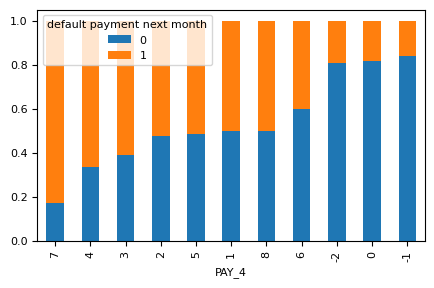

In [41]:
## PAY_4
tdf  = df_raw.groupby("PAY_4")[target_variable].value_counts(normalize = True).unstack().sort_values(by = 1,ascending=False)
print(tdf)
tdf.plot(kind='bar', stacked='True')

default payment next month     0     1
PAY_5                                 
 8                           NaN 1.000
 7                         0.172 0.828
 6                         0.250 0.750
 3                         0.365 0.635
 4                         0.393 0.607
 5                         0.412 0.588
 2                         0.458 0.542
-2                         0.803 0.197
 0                         0.811 0.189
-1                         0.838 0.162


<AxesSubplot:xlabel='PAY_5'>

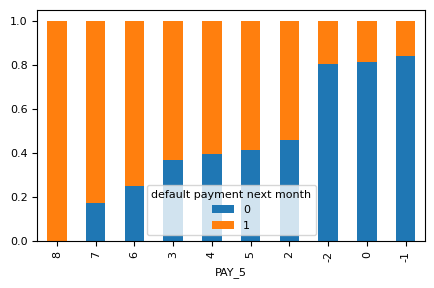

In [42]:
## PAY_5
tdf  = df_raw.groupby("PAY_5")[target_variable].value_counts(normalize = True).unstack().sort_values(by = 1,ascending=False)
print(tdf)
tdf.plot(kind='bar', stacked='True')

default payment next month     0     1
PAY_6                                 
 8                           NaN 1.000
 7                         0.174 0.826
 6                         0.263 0.737
 3                         0.359 0.641
 4                         0.367 0.633
 5                         0.462 0.538
 2                         0.493 0.507
-2                         0.800 0.200
 0                         0.812 0.188
-1                         0.830 0.170


<AxesSubplot:xlabel='PAY_6'>

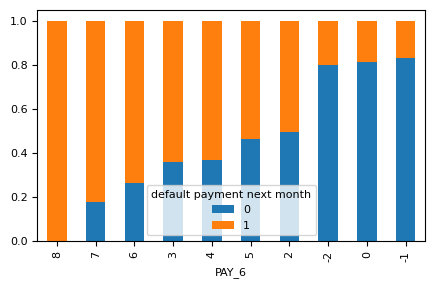

In [43]:
## PAY_6
tdf  = df_raw.groupby("PAY_6")[target_variable].value_counts(normalize = True).unstack().sort_values(by = 1,ascending=False)
print(tdf)
tdf.plot(kind='bar', stacked='True')

In [44]:
#### Observations from Payment Amount features:
### -1, 0, -2 almost same default rate : I will treat them same, convert all of these to 0 (so we will have this as ordinal feature from 0,1,2,3, etc..)
### As the Payment delay for months increases the default rate or tendency to default next month also increases